# Final Project

## Predict whether a mammogram mass is benign or malignant

We'll be using the "mammographic masses" public dataset from the UCI repository (source: https://archive.ics.uci.edu/ml/datasets/Mammographic+Mass)

This data contains 961 instances of masses detected in mammograms, and contains the following attributes:


   1. BI-RADS assessment: 1 to 5 (ordinal)  
   2. Age: patient's age in years (integer)
   3. Shape: mass shape: round=1 oval=2 lobular=3 irregular=4 (nominal)
   4. Margin: mass margin: circumscribed=1 microlobulated=2 obscured=3 ill-defined=4 spiculated=5 (nominal)
   5. Density: mass density high=1 iso=2 low=3 fat-containing=4 (ordinal)
   6. Severity: benign=0 or malignant=1 (binominal)
   
BI-RADS is an assesment of how confident the severity classification is; it is not a "predictive" attribute and so we will discard it. The age, shape, margin, and density attributes are the features that we will build our model with, and "severity" is the classification we will attempt to predict based on those attributes.

Although "shape" and "margin" are nominal data types, which sklearn typically doesn't deal with well, they are close enough to ordinal that we shouldn't just discard them. The "shape" for example is ordered increasingly from round to irregular.

A lot of unnecessary anguish and surgery arises from false positives arising from mammogram results. If we can build a better way to interpret them through supervised machine learning, it could improve a lot of lives.

## Your assignment

Build a Multi-Layer Perceptron and train it to classify masses as benign or malignant based on its features.

The data needs to be cleaned; many rows contain missing data, and there may be erroneous data identifiable as outliers as well.

Remember to normalize your data first! And experiment with different topologies, optimizers, and hyperparameters.

I was able to achieve over 80% accuracy - can you beat that?


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Let's begin: prepare your data

Start by importing the mammographic_masses.data.txt file into a Pandas dataframe (hint: use read_csv) and take a look at it.

In [10]:
df = pd.read_csv('mammographic_masses.data.txt', na_values= '?', names=['BI_RADS','age','shape','margin','density','severity'])

In [12]:
df

,BI_RADS,age,shape,margin,density,severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
...,...,...,...,...,...,...
956,4.0,47.0,2.0,1.0,3.0,0
957,4.0,56.0,4.0,5.0,3.0,1
958,4.0,64.0,4.0,5.0,3.0,0
959,5.0,66.0,4.0,5.0,3.0,1


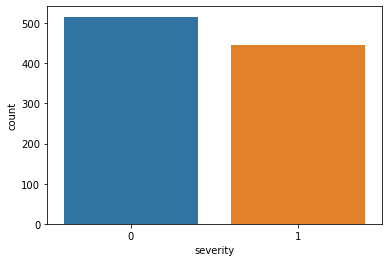

In [24]:
# df.severity.value_counts().plot(kind = 'bar')
sns.countplot(df.severity)

In [26]:
y = df.pop('severity')

In [36]:
df.head(10)

,BI_RADS,age,shape,margin,density
0,5.0,67.0,3.0,5.0,3.0
1,4.0,43.0,1.0,1.0,NaN
2,5.0,58.0,4.0,5.0,3.0
3,4.0,28.0,1.0,1.0,3.0
4,5.0,74.0,1.0,5.0,NaN
5,4.0,65.0,1.0,NaN,3.0
6,4.0,70.0,NaN,NaN,3.0
7,5.0,42.0,1.0,NaN,3.0
8,5.0,57.0,1.0,5.0,3.0
9,5.0,60.0,NaN,5.0,1.0


In [37]:
cols = df.columns

In [28]:
df.isnull().sum()

BI_RADS     2
age         5
shape      31
margin     48
density    76
dtype: int64

In [54]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

In [65]:
pipe = Pipeline([
    ('imputer', KNNImputer()),
    ('normalize',MinMaxScaler(feature_range = (0,1)))
])

In [66]:
clean_data = pd.DataFrame(pipe.fit(df).transform(df), columns=cols)

# Transform Data

In [67]:
clean_data

,BI_RADS,age,shape,margin,density
0,0.090909,0.628205,0.666667,1.0,0.666667
1,0.072727,0.320513,0.000000,0.0,0.666667
2,0.090909,0.512821,1.000000,1.0,0.666667
3,0.072727,0.128205,0.000000,0.0,0.666667
4,0.090909,0.717949,0.000000,1.0,0.666667
...,...,...,...,...,...
956,0.072727,0.371795,0.333333,0.0,0.666667
957,0.072727,0.487179,1.000000,1.0,0.666667
958,0.072727,0.589744,1.000000,1.0,0.666667
959,0.090909,0.615385,1.000000,1.0,0.666667


In [68]:
clean_data.isnull().sum()

BI_RADS    0
age        0
shape      0
margin     0
density    0
dtype: int64

# Let's Remove Outliers :)

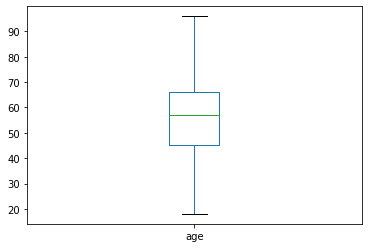

In [69]:
df.age.plot(kind='box')

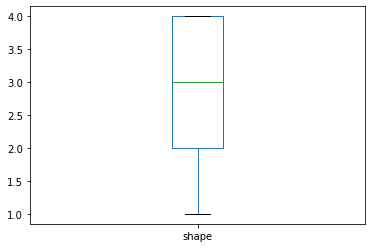

In [70]:
df['shape'].plot(kind = 'box')

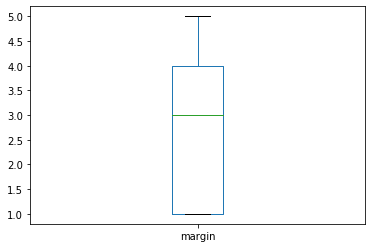

In [71]:
df.margin.plot(kind='box')

C:\Users\Khizar Sultan\AppData\Local\Continuum\anaconda3\envs\r-tutorial\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Khizar Sultan\AppData\Local\Continuum\anaconda3\envs\r-tutorial\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


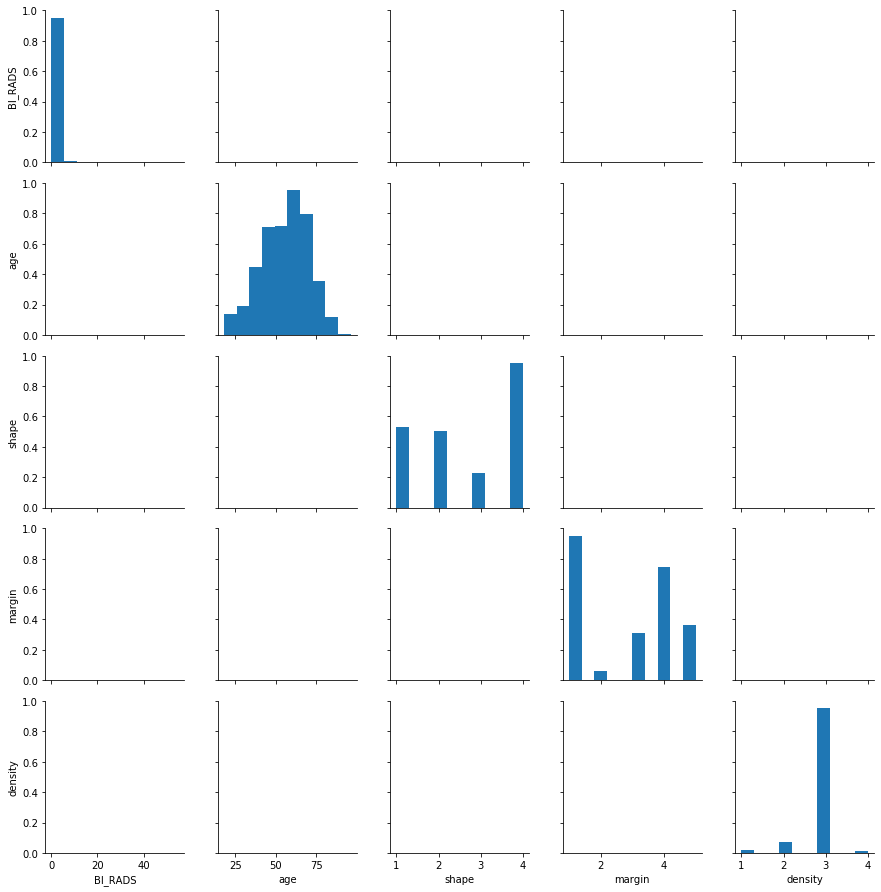

In [46]:
sns.pairplot(df, kind='box')

In [121]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [114]:
X = clean_data.iloc[:].values

In [111]:
y = y.values

In [117]:
x_train, x_test, y_train, y_test = train_test_split(X,y)

In [137]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [148]:
models = [] 
models.append(('SVM',SVC()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('DT',DecisionTreeClassifier()))

In [127]:
results = [] 
names = []
for name, model in models: 
    kfold = KFold(n_splits = 10, random_state = 42) 
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy')         
    results.append(cv_results.mean()) 
    names.append(name)

C:\Users\Khizar Sultan\AppData\Local\Continuum\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Khizar Sultan\AppData\Local\Continuum\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Khizar Sultan\AppData\Local\Continuum\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [128]:
print("Choose the best model")
for name,result in zip(names,results):
    print(f"{name} -> Accuracy {result}")

Choose the best model
SVM -> Accuracy 0.7986111111111112
KNN -> Accuracy 0.7972222222222223
DT -> Accuracy 0.7430555555555556


# Let's move to ensemble learning :)

## Bagging :)

In [144]:
# Bagging
from sklearn.ensemble import BaggingClassifier

# ensemble lerning Algorithms
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier, 


In [135]:
results = [] 
names = []
for name, model in models: 
    kfold = KFold(n_splits = 10, random_state = 42) 
    cv_results = cross_val_score(BaggingClassifier(model, n_estimators = 100), x_train, y_train, cv = kfold, scoring = 'accuracy')         
    results.append(cv_results.mean()) 
    names.append(name)

C:\Users\Khizar Sultan\AppData\Local\Continuum\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Khizar Sultan\AppData\Local\Continuum\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Khizar Sultan\AppData\Local\Continuum\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [145]:
print("Choose the best model")
for name,result in zip(names,results):
    print(f"{name} -> Accuracy {result}")

Choose the best model
SVM -> Accuracy 0.8041666666666668
KNN -> Accuracy 0.7972222222222223
DT -> Accuracy 0.7666666666666667


# Stacking :)
#### 4 input models and 1 output model

In [152]:
models = []

In [153]:
# ensemble lerning
models.append(('RF',RandomForestClassifier()))
models.append(('GBR',GradientBoostingClassifier()))
models.append(('ADA',AdaBoostClassifier()))
models.append(('ETC',ExtraTreesClassifier())) 

In [155]:
reg = StackingClassifier(estimators=models, final_estimator=GradientBoostingClassifier())

In [157]:
kfold = KFold(n_splits = 10, random_state = 42) 
cv_results = cross_val_score(reg,x_train, y_train, cv = kfold, scoring = 'accuracy')

C:\Users\Khizar Sultan\AppData\Local\Continuum\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [158]:
accuracy = np.mean(cv_results)

In [159]:
accuracy

0.7930555555555556

# Ensemble Learning build in Algorithms 

In [160]:
models = []
# ensemble lerning
models.append(('RF',RandomForestClassifier()))
models.append(('GBR',GradientBoostingClassifier()))
models.append(('ADA',AdaBoostClassifier()))
models.append(('ETC',ExtraTreesClassifier())) 

In [161]:
results = [] 
names = []
for name, model in models: 
    kfold = KFold(n_splits = 10, random_state = 42) 
    cv_results = cross_val_score(model, x_train, y_train, cv = kfold, scoring = 'accuracy')         
    results.append(cv_results.mean()) 
    names.append(name)

C:\Users\Khizar Sultan\AppData\Local\Continuum\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Khizar Sultan\AppData\Local\Continuum\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\Khizar Sultan\AppData\Local\Continuum\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\K

In [ ]:
# print("Choose the best model")
for name,result in zip(names,results):
    print(f"{name} -> Accuracy {result}")

## Finally got 80% Accuracy :) 

## Let's move to Deep Learning  

In [164]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

def create_model():
    model = Sequential()
    #4 feature inputs going into an 6-unit layer (more does not seem to help - in fact you can go down to 4)
    model.add(Dense(6, input_dim=4, kernel_initializer='normal', activation='relu'))
    # "Deep learning" turns out to be unnecessary - this additional hidden layer doesn't help either.
    #model.add(Dense(4, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (benign or malignant)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model; rmsprop seemed to work best
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
from sklearn.model_selection import cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator, all_features_scaled, all_classes, cv=10)
cv_scores.mean()